In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import OneHotEncoder


## 1.Importation et presentation des donnees

In [36]:
#Importation des donnees
data=pd.read_csv("corporateCreditRatingWithFinancialRatios.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   int64  
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   float64
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                   7805 non-null   f

In [37]:
data.head(10)

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174
5,Standard & Poor's Ratings Services,Cardinal Health Inc.,BBB+,2010-09-16,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174
6,Standard & Poor's Ratings Services,Carpenter Technology Corp.,BBB,2010-12-20,17843,1,3312.0,Manuf,CRS,3.7607,...,5.9069,0.3921,0.1585,0.7571,0.3662,0.4034,0.1326,0.2521,-0.6973,0.9587
7,Standard & Poor's Ratings Services,Companhia de Saneamento Basico do Estado de Sa...,BB,2010-12-07,1170858,0,4941.0,Utils,SBS,0.8134,...,40.1446,28.7928,20.4126,0.3121,13.0426,15.2863,6.3671,8.5405,1.5316,0.1005
8,Standard & Poor's Ratings Services,Compass Group PLC,BBB+,2010-05-28,1563190,1,7371.0,BusEq,COMP,1.0668,...,43.6578,23.1982,15.9279,0.3886,21.2038,18.3188,6.5242,11.8033,1.2684,0.9432
9,Standard & Poor's Ratings Services,Diageo PLC,A-,2010-10-01,835403,1,2085.0,NoDur,DEO,1.7627,...,30.1227,22.8936,17.8220,0.5027,37.0226,-91.3355,9.1082,13.6689,1.5979,1.8099


In [38]:
#Affichage des valeurs uniques par colonne
for col in data.columns:
    uniques = data[col].unique()
    print(f"\n📌 Colonne: {col}")
    print(f"Nombre de valeurs uniques: {len(uniques)}")
    print(f"Valeurs uniques: {uniques[:10]}{' ...' if len(uniques) > 10 else ''}")



📌 Colonne: Rating Agency
Nombre de valeurs uniques: 7
Valeurs uniques: ["Standard & Poor's Ratings Services" 'DBRS' "Moody's Investors Service"
 'Fitch Ratings' 'Japan Credit Rating Agency,Ltd.'
 'HR Ratings de Mexico S.A. de C.V.' 'Egan-Jones Ratings Company']

📌 Colonne: Corporation
Nombre de valeurs uniques: 1377
Valeurs uniques: ['American States Water Co.' 'Automatic Data Processing Inc.' 'Avnet Inc.'
 'California Water Service Co.' 'Cardinal Health Inc.'
 'Carpenter Technology Corp.'
 'Companhia de Saneamento Basico do Estado de Sao Paulo'
 'Compass Group PLC' 'Diageo PLC' 'Entergy Corp'] ...

📌 Colonne: Rating
Nombre de valeurs uniques: 23
Valeurs uniques: ['A-' 'AAA' 'BBB-' 'AA-' 'A' 'BBB+' 'BBB' 'BB' 'B' 'BB+'] ...

📌 Colonne: Rating Date
Nombre de valeurs uniques: 1414
Valeurs uniques: ['2010-07-30' '2010-09-16' '2010-11-23' '2010-06-29' '2010-07-14'
 '2010-12-20' '2010-12-07' '2010-05-28' '2010-10-01' '2010-09-15'] ...

📌 Colonne: CIK
Nombre de valeurs uniques: 686
Valeurs 

## 2.Analyse et exploration des donnees

In [39]:
#Nouveau data1 avec les variables pertinentes
colonnes_data1 = [
    "Rating",
    "Binary Rating",
    "SIC Code",
    "Current Ratio",
    "Long-term Debt / Capital",
    "Debt/Equity Ratio",
    "Gross Margin",
    "Operating Margin",
    "EBIT Margin",
    "EBITDA Margin",
    "Pre-Tax Profit Margin",
    "Net Profit Margin",
    "Asset Turnover",
    "ROE - Return On Equity",
    "Return On Tangible Equity",
    "ROA - Return On Assets",
    "ROI - Return On Investment",
    "Operating Cash Flow Per Share",
    "Free Cash Flow Per Share"
]

data1 = data[colonnes_data1].copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating                         7805 non-null   object 
 1   Binary Rating                  7805 non-null   int64  
 2   SIC Code                       7805 non-null   float64
 3   Current Ratio                  7805 non-null   float64
 4   Long-term Debt / Capital       7805 non-null   float64
 5   Debt/Equity Ratio              7805 non-null   float64
 6   Gross Margin                   7805 non-null   float64
 7   Operating Margin               7805 non-null   float64
 8   EBIT Margin                    7805 non-null   float64
 9   EBITDA Margin                  7805 non-null   float64
 10  Pre-Tax Profit Margin          7805 non-null   float64
 11  Net Profit Margin              7805 non-null   float64
 12  Asset Turnover                 7805 non-null   f

In [40]:
data1['Rating'].unique()


array(['A-', 'AAA', 'BBB-', 'AA-', 'A', 'BBB+', 'BBB', 'BB', 'B', 'BB+',
       'B+', 'BB-', 'B-', 'A+', 'CCC', 'AA', 'CCC+', 'CC', 'C', 'CCC-',
       'AA+', 'D', 'CC+'], dtype=object)

In [41]:
data1["Rating"].value_counts

<bound method IndexOpsMixin.value_counts of 0         A-
1        AAA
2       BBB-
3        AA-
4          A
        ... 
7800    BBB+
7801    BBB+
7802      CC
7803     CCC
7804      CC
Name: Rating, Length: 7805, dtype: object>

In [42]:
data1.head(10)

,Rating,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,A-,1,4941.0,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,AAA,1,7374.0,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,BBB-,1,5065.0,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,AA-,1,4941.0,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,A,1,5122.0,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174
5,BBB+,1,5122.0,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174
6,BBB,1,3312.0,3.7607,0.3116,0.4527,12.0808,0.9761,0.9761,5.9069,0.3921,0.1585,0.7571,0.3662,0.4034,0.1326,0.2521,-0.6973,0.9587
7,BB,0,4941.0,0.8134,0.3452,0.6231,54.2938,31.8143,31.8143,40.1446,28.7928,20.4126,0.3121,13.0426,15.2863,6.3671,8.5405,1.5316,0.1005
8,BBB+,1,7371.0,1.0668,0.3398,0.8900,64.6665,37.2524,37.2524,43.6578,23.1982,15.9279,0.3886,21.2038,18.3188,6.5242,11.8033,1.2684,0.9432
9,A-,1,2085.0,1.7627,0.6308,1.8312,58.0879,26.3191,26.3191,30.1227,22.8936,17.8220,0.5027,37.0226,-91.3355,9.1082,13.6689,1.5979,1.8099


In [43]:
#encodage de la variable categorielle Rating
rating_order = {
    'AAA': 21, 'AA+': 20, 'AA': 19, 'AA-': 18,
    'A+': 17, 'A': 16, 'A-': 15,
    'BBB+': 14, 'BBB': 13, 'BBB-': 12,
    'BB+': 11, 'BB': 10, 'BB-': 9,
    'B+': 8, 'B': 7, 'B-': 6,
    'CCC+': 5, 'CCC': 4, 'CCC-': 3,
    'CC+': 2, 'CC': 1, 'C': 0, 'D': -1
}

data1['Rating_ordinal'] = data1['Rating'].map(rating_order)


In [44]:
#data1 apres encodage
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating                         7805 non-null   object 
 1   Binary Rating                  7805 non-null   int64  
 2   SIC Code                       7805 non-null   float64
 3   Current Ratio                  7805 non-null   float64
 4   Long-term Debt / Capital       7805 non-null   float64
 5   Debt/Equity Ratio              7805 non-null   float64
 6   Gross Margin                   7805 non-null   float64
 7   Operating Margin               7805 non-null   float64
 8   EBIT Margin                    7805 non-null   float64
 9   EBITDA Margin                  7805 non-null   float64
 10  Pre-Tax Profit Margin          7805 non-null   float64
 11  Net Profit Margin              7805 non-null   float64
 12  Asset Turnover                 7805 non-null   f

In [45]:
data1.head(10)

,Rating,Binary Rating,SIC Code,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Rating_ordinal
0,A-,1,4941.0,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333,15
1,AAA,1,7374.0,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132,21
2,BBB-,1,5065.0,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231,12
3,AA-,1,4941.0,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999,18
4,A,1,5122.0,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174,16
5,BBB+,1,5122.0,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174,14
6,BBB,1,3312.0,3.7607,0.3116,0.4527,12.0808,0.9761,0.9761,5.9069,0.3921,0.1585,0.7571,0.3662,0.4034,0.1326,0.2521,-0.6973,0.9587,13
7,BB,0,4941.0,0.8134,0.3452,0.6231,54.2938,31.8143,31.8143,40.1446,28.7928,20.4126,0.3121,13.0426,15.2863,6.3671,8.5405,1.5316,0.1005,10
8,BBB+,1,7371.0,1.0668,0.3398,0.8900,64.6665,37.2524,37.2524,43.6578,23.1982,15.9279,0.3886,21.2038,18.3188,6.5242,11.8033,1.2684,0.9432,14
9,A-,1,2085.0,1.7627,0.6308,1.8312,58.0879,26.3191,26.3191,30.1227,22.8936,17.8220,0.5027,37.0226,-91.3355,9.1082,13.6689,1.5979,1.8099,15


In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating                         7805 non-null   object 
 1   Binary Rating                  7805 non-null   int64  
 2   SIC Code                       7805 non-null   float64
 3   Current Ratio                  7805 non-null   float64
 4   Long-term Debt / Capital       7805 non-null   float64
 5   Debt/Equity Ratio              7805 non-null   float64
 6   Gross Margin                   7805 non-null   float64
 7   Operating Margin               7805 non-null   float64
 8   EBIT Margin                    7805 non-null   float64
 9   EBITDA Margin                  7805 non-null   float64
 10  Pre-Tax Profit Margin          7805 non-null   float64
 11  Net Profit Margin              7805 non-null   float64
 12  Asset Turnover                 7805 non-null   f

/tmp/ipykernel_8112/2654943640.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating_ordinal', data=data1, palette='viridis')


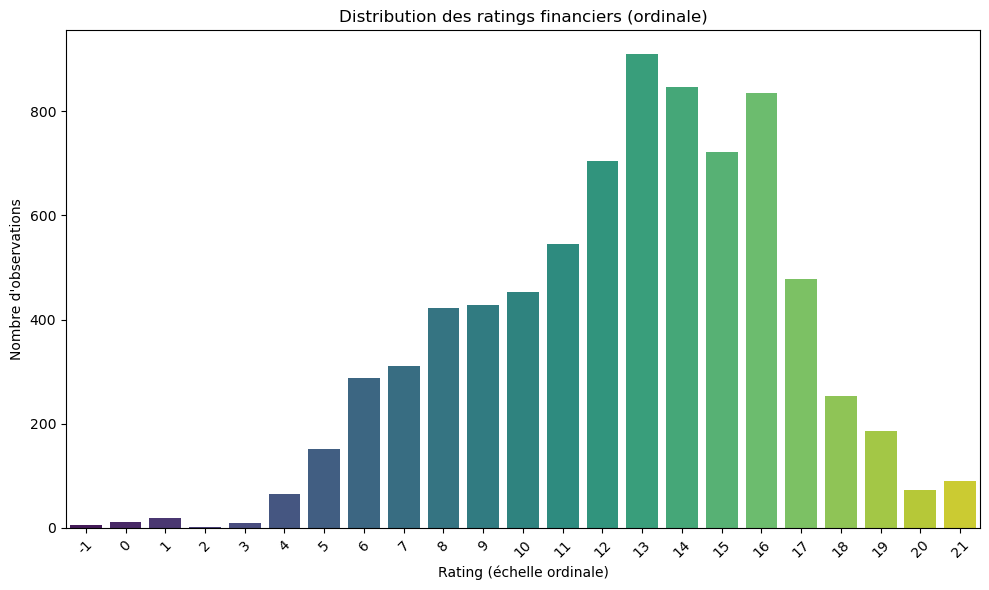

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='Rating_ordinal', data=data1, palette='viridis')
plt.title("Distribution des ratings financiers (ordinale)")
plt.xlabel("Rating (échelle ordinale)")
plt.ylabel("Nombre d'observations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_8112/270552883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Binary Rating', y='Current Ratio', data=data1, palette='Set2')


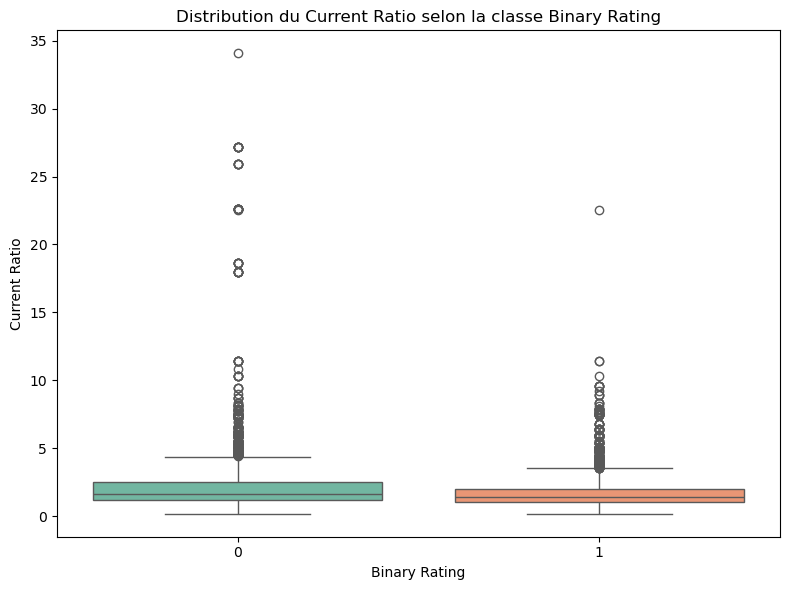

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Binary Rating', y='Current Ratio', data=data1, palette='Set2')
plt.title("Distribution du Current Ratio selon la classe Binary Rating")
plt.xlabel("Binary Rating")
plt.ylabel("Current Ratio")
plt.tight_layout()
plt.show()


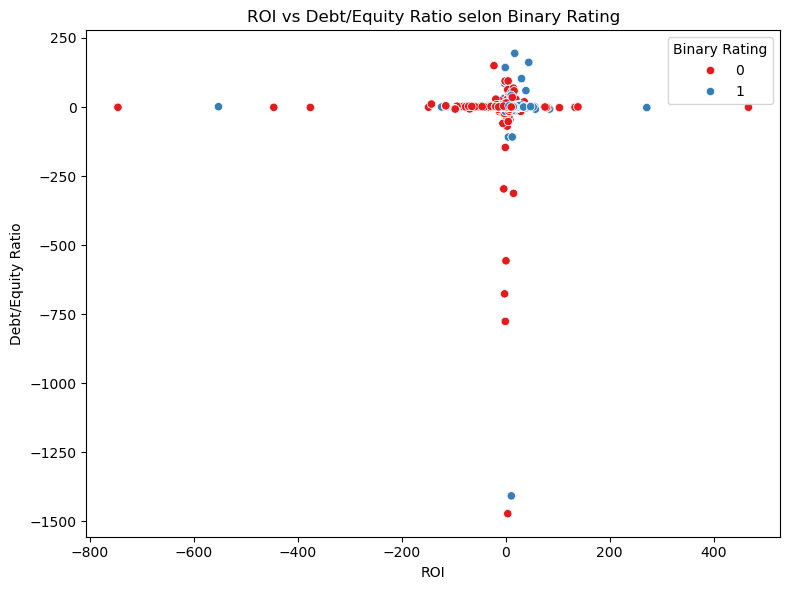

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ROI - Return On Investment',
                y='Debt/Equity Ratio',
                hue='Binary Rating',
                palette='Set1',
                data=data1)
plt.title("ROI vs Debt/Equity Ratio selon Binary Rating")
plt.xlabel("ROI")
plt.ylabel("Debt/Equity Ratio")
plt.tight_layout()
plt.show()


/tmp/ipykernel_5199/167888488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data1, x='Binary Rating', y='Operating Margin', palette='coolwarm')


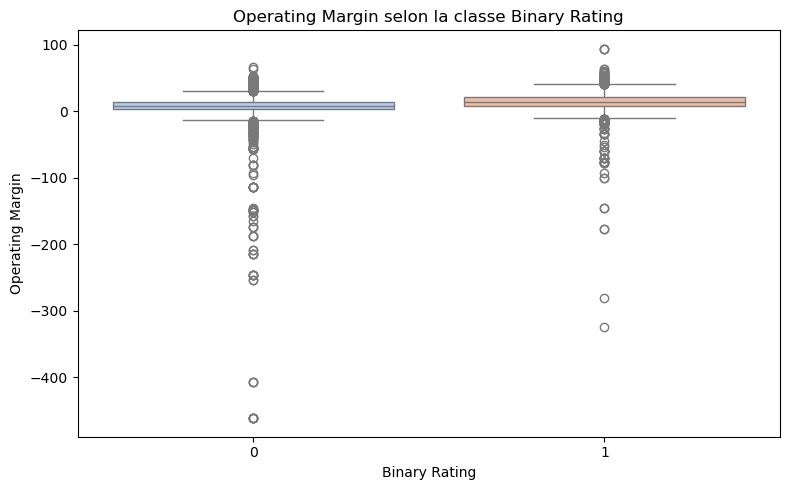

In [ ]:
#detecter les variables discriminantes
#Comparer visuellement les distributions entre les deux classes (0 et 1).
plt.figure(figsize=(8,5))
sns.boxplot(data=data1, x='Binary Rating', y='Operating Margin', palette='coolwarm')
plt.title("Operating Margin selon la classe Binary Rating")
plt.xlabel("Binary Rating")
plt.ylabel("Operating Margin")
plt.tight_layout()
plt.show()


/tmp/ipykernel_5199/138275123.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Binary Rating', data=data1, palette='pastel')


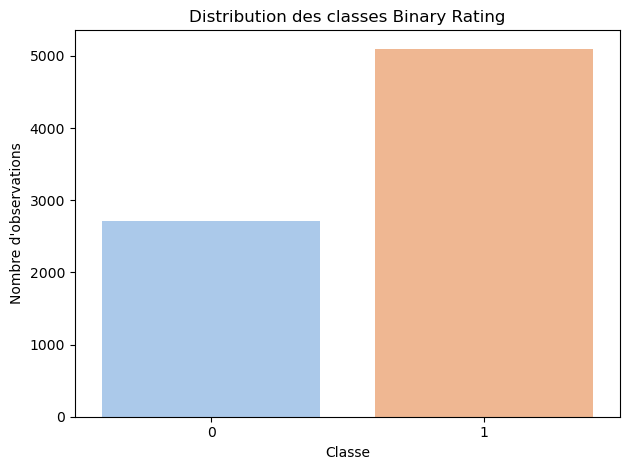

In [ ]:
#distribution des classes
'''
Si une classe domine fortement, les métriques d’évaluation classiques (accuracy) ne suffiront pas : 
il faudra utiliser F1-score, AUC, etc.
'''
sns.countplot(x='Binary Rating', data=data1, palette='pastel')
plt.title("Distribution des classes Binary Rating")
plt.xlabel("Classe")
plt.ylabel("Nombre d'observations")
plt.tight_layout()
plt.show()


## 3.Predictions

### 3.1.Prédire Binary Rating (0 ou 1)

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Supposons que data1 est ton DataFrame déjà prêt avec toutes les variables numériques

# Sélection des features et de la cible
X = data1.drop(columns=['Rating', 'Binary Rating', 'Rating_ordinal'])
y = data1['Binary Rating']  # Cible binaire

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionnaire des modèles (remplacement de XGBoost par GradientBoostingClassifier)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = []

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    results.append({
        'Modèle': name,
        'Accuracy': round(acc, 3),
        'Precision': round(prec, 3),
        'Recall': round(rec, 3)
    })

results_df = pd.DataFrame(results)
print(results_df)


                Modèle  Accuracy  Precision  Recall
0  Logistic Regression     0.795      0.791   0.940
1        Random Forest     0.944      0.952   0.965
2                  SVM     0.824      0.826   0.933
3    Gradient Boosting     0.869      0.872   0.941


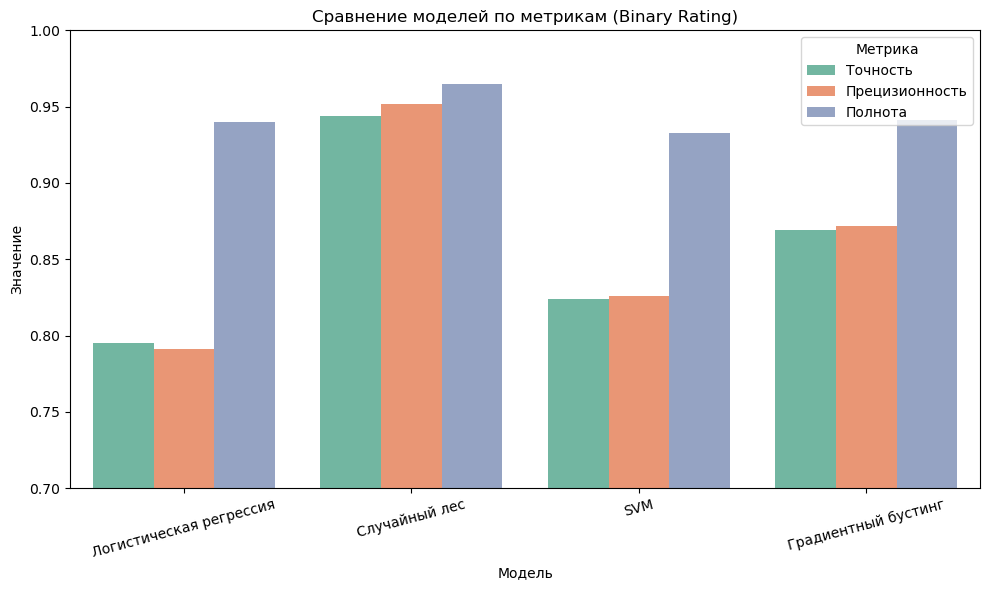

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Результаты моделей в виде DataFrame
results_df = pd.DataFrame({
    'Модель': ['Логистическая регрессия', 'Случайный лес', 'SVM', 'Градиентный бустинг'],
    'Точность': [0.795, 0.944, 0.824, 0.869],
    'Прецизионность': [0.791, 0.952, 0.826, 0.872],
    'Полнота': [0.940, 0.965, 0.933, 0.941]
})

# Преобразование для построения графика
df_melted = results_df.melt(id_vars='Модель', 
                            value_vars=['Точность', 'Прецизионность', 'Полнота'],
                            var_name='Метрика', value_name='Значение')

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Модель', y='Значение', hue='Метрика', palette='Set2')

plt.title("Сравнение моделей по метрикам (Binary Rating)")
plt.ylim(0.7, 1.0)
plt.ylabel("Значение")
plt.xticks(rotation=15)
plt.legend(title="Метрика")
plt.tight_layout()
plt.show()


### 3.2.Prediction rating_ordinal

In [53]:
import pandas as pd

# Compter le nombre d'exemples par classe
counts = data1['Rating_ordinal'].value_counts()

# Identifier les classes rares (< 5 exemples ici)
rare_classes = counts[counts < 5].index

# Créer une nouvelle colonne en copiant Rating_ordinal
data1['Rating_grouped'] = data1['Rating_ordinal']

# Remplacer les classes rares par une nouvelle valeur, par exemple 0
data1.loc[data1['Rating_ordinal'].isin(rare_classes), 'Rating_grouped'] = 0

# Vérifier la nouvelle distribution
print(data1['Rating_grouped'].value_counts())


Rating_grouped
 13    910
 14    846
 16    836
 15    722
 12    705
 11    545
 17    478
 10    453
 9     427
 8     422
 7     310
 6     288
 18    254
 19    185
 5     151
 21     90
 20     73
 4      65
 1      18
 0      12
 3      10
-1       5
Name: count, dtype: int64


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Étape 1 : Regrouper les classes rares (< 50 observations)
counts = data1['Rating_ordinal'].value_counts()
rare_classes = counts[counts < 50].index
data1['Rating_grouped'] = data1['Rating_ordinal']
data1.loc[data1['Rating_ordinal'].isin(rare_classes), 'Rating_grouped'] = 0

# Étape 2 : Séparation des variables explicatives et cible
X = data1.drop(columns=['Rating', 'Rating_ordinal', 'Rating_grouped'])
y = data1['Rating_grouped']

# Étape 3 : Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Étape 4 : Normalisation des variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Étape 5 : Définition des modèles
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Étape 6 : Entraînement et évaluation
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')

    results.append({
        'Modèle': name,
        'Accuracy': round(acc, 3),
        'Precision': round(prec, 3),
        'Recall': round(rec, 3)
    })

# Résultats sous forme de tableau
results_df = pd.DataFrame(results)
print(results_df)


                Modèle  Accuracy  Precision  Recall
0  Logistic Regression     0.218      0.220   0.218
1        Random Forest     0.480      0.481   0.480
2                  SVM     0.250      0.292   0.250
3    Gradient Boosting     0.416      0.417   0.416


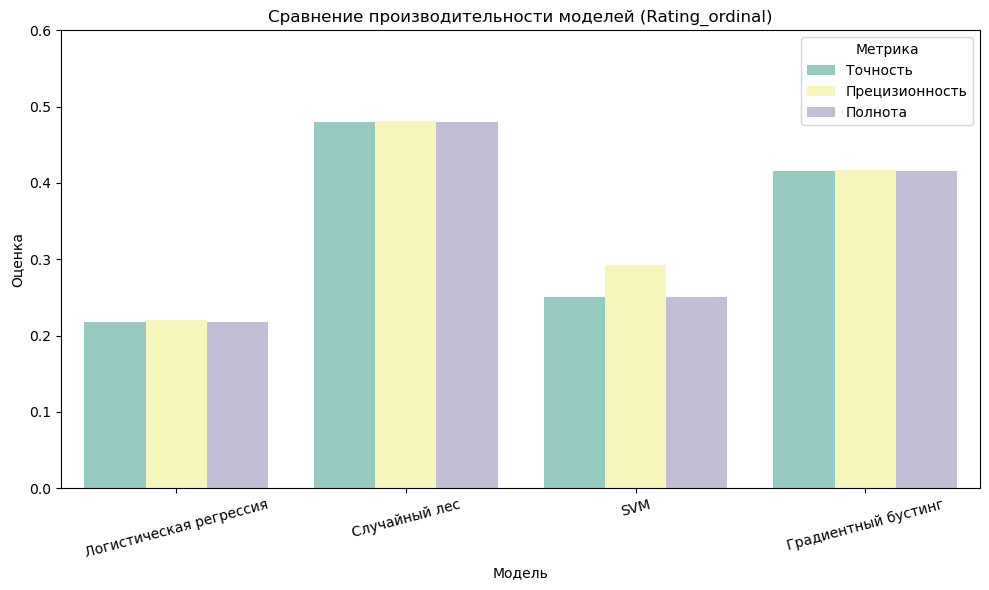

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Данные о производительности моделей для Rating_ordinal
results_ordinal = pd.DataFrame({
    'Модель': ['Логистическая регрессия', 'Случайный лес', 'SVM', 'Градиентный бустинг'],
    'Точность': [0.218, 0.480, 0.250, 0.416],
    'Прецизионность': [0.220, 0.481, 0.292, 0.417],
    'Полнота': [0.218, 0.480, 0.250, 0.416]
})

# Преобразуем данные в длинный формат для построения с помощью seaborn
df_melted = results_ordinal.melt(id_vars='Модель',
                                 value_vars=['Точность', 'Прецизионность', 'Полнота'],
                                 var_name='Метрика', value_name='Значение')

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Модель', y='Значение', hue='Метрика', palette='Set3')

plt.title("Сравнение производительности моделей (Rating_ordinal)")
plt.ylim(0.0, 0.6)
plt.ylabel("Оценка")
plt.xticks(rotation=15)
plt.legend(title="Метрика")
plt.tight_layout()
plt.show()
